In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

C:\Users\maria\anaconda3\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df_prueba = pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
df_prueba = df_prueba.rename(columns={"concept:name": "Operation", "Variant": "concept:name"})

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['q-y'] = df_prueba['Question'] + '-' + df_prueba['Year']
df_prueba

df_prueba

,case:id,case:concept:name,Operation,concept:name,time:timestamp,Question,Report,Year,Category,Type,Tupla,Organization,q-y
0,A2 P4 BPI 2020,A2 P4 BPI 2020,Filter activities,Filter activities by sub-processes,2022-03-11 19:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University",P4-2020
1,A2 P4 BPI 2020,A2 P4 BPI 2020,Group activities,Group activities by sub-processes,2022-03-11 20:24:15.966942,P4,A2,2020,Student,Manipulation,A22020,"Faculty of Science, Utrecht University",P4-2020
2,A2 P4 BPI 2020,A2 P4 BPI 2020,Calculate cycle time,Calculate cycle time for all pairs of events f...,2022-03-11 21:24:15.966942,P4,A2,2020,Student,Analyze Time,A22020,"Faculty of Science, Utrecht University",P4-2020
3,A7 P4 BPI 2020,A7 P4 BPI 2020,Group activities,Group activities by role,2022-03-11 22:24:15.966942,P4,A7,2020,Academic,Manipulation,A72020,German Research Center for Artificial Intellig...,P4-2020
4,A7 P4 BPI 2020,A7 P4 BPI 2020,Calculate throughput,Calculate throughput,2022-03-11 23:24:15.966942,P4,A7,2020,Academic,Analyze Time,A72020,German Research Center for Artificial Intellig...,P4-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Group traces,Group traces by activities,2022-04-20 09:24:15.966942,P1-P2,A19,2020,Professional,Manipulation,A192020,Sberbank,P1-P2-2020
951,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate statistics,Calculate Statistics of activities,2022-04-20 10:24:15.966942,P1-P2,A19,2020,Professional,Calculate statistics,A192020,Sberbank,P1-P2-2020
952,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Calculate throughput,Calculate throughput,2022-04-20 11:24:15.966942,P1-P2,A19,2020,Professional,Analyze Time,A192020,Sberbank,P1-P2-2020
953,A19 P1-P2 BPI 2020,A19 P1-P2 BPI 2020,Represent temporal series,Represent temporal series of throughput,2022-04-20 12:24:15.966942,P1-P2,A19,2020,Professional,Representation,A192020,Sberbank,P1-P2-2020


In [3]:
df_report_year = df_prueba.groupby(by=['Question', 'Year'])
for name, group in df_report_year:
    operations = group['concept:name'].to_list()

In [9]:
df_analisis = df_prueba.groupby(by=['case:concept:name'])
# columns=['case:concept:name','Operations','Organization', 'Year', 'Question']
df_agrupado = pd.DataFrame(columns=['case:concept:name','Operations','Organization', 'Year', 'Question'])
for name, group in df_analisis:
    org = group.iloc[0]['Organization']
    year = group.iloc[0]['Year']
    question = group.iloc[0]['Question']
    lista = group['concept:name'].to_list()
        
    new_row={'case:concept:name':name, 'Operations':lista, 'Organization':org, 'Year':year, 'Question':question} 
    df_agrupado = df_agrupado.append(new_row, ignore_index=True)
    
df_agrupado

,case:concept:name,Operations,Organization,Year,Question
0,A1 P1 BPI 2017,[Calculate cycle time of the whole process for...,University of Liechtenstein\r\nVienna Universi...,2017,P1
1,A1 P1-P2 BPI 2020,"[Filter traces by activities, Calculate cycle ...","Technische Universität, Berlin",2020,P1-P2
2,A1 P2 BPI 2019,"[Group events by time, Calculate cycle time of...",University of Melbourne,2019,P2
3,A1 P5 BPI 2015,[Calculate cycle time of the whole process for...,Meijer & Van der Ham Management Consultants,2015,P5
4,A1 P5 BPI 2020,"[Filter traces by activities, Calculate cycle ...","Technische Universität, Berlin",2020,P5
...,...,...,...,...,...
105,A8 P1 BPI 2017,"[Filter traces by activities, Calculate waitin...",Universidade Federal do Estado do Rio de Janeiro,2017,P1
106,A8 P5 BPI 2015,[Calculate cycle time of the whole process for...,GRADIENT ECM,2015,P5
107,A9 P1 BPI 2017,"[Calculate processing time, Calculate waiting ...",POSTECH,2017,P1
108,A9 P2 BPI 2019,"[Filter traces by year, Calculate cycle time o...",KPMG Netherlands,2019,P2


In [4]:
def overlapIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
#     print(float(len(list(intersection))))
#     print(min([len1,len2]))
    overlapIndex=float(len(list(intersection)))/min([len1,len2])
    return overlapIndex

In [5]:
def jaccardIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    tamIntersection=len(list(intersection))
    union = set1.union(set2)
    tamUnion=len(list(union))
#     print("similitud: "+str(float(tamIntersection)/tamUnion))
    return float(tamIntersection)/tamUnion

In [6]:
def sorensenIndex(list1,list2):
    set1=set(list1)
    set2=set(list2)
    intersection = set1.intersection(set2)
    len1=len(list(set1))
    len2=len(list(set2))
    sorensenIndex=float(2*len(list(intersection)))/(len1+len2)
    return sorensenIndex

In [11]:
df2 = df_agrupado.groupby(by=['Year', 'Question'])
columns=['analisis','question','overlap', 'jaccard', 'sorensen']
df_metricas_preguntas = pd.DataFrame(columns=columns)

for name, group in df2:
#     print(name[1])
    for i in range(len(group)):
        
        for j in range(i+1,len(group)):
            grupo = group.iloc[i]['Operations']
            analisis = group.iloc[i]['case:concept:name'] + "-" + group.iloc[j]['case:concept:name']
            
            question = name[1] + name[0]
            sorensen = sorensenIndex(grupo,group.iloc[j]['Operations'])
            overlap = overlapIndex(grupo,group.iloc[j]['Operations'])
            jaccard = jaccardIndex(grupo,group.iloc[j]['Operations'])
            new_row={'analisis':analisis, 'question':question, 'overlap': overlap, 'jaccard':jaccard, 'sorensen':sorensen} 
            df_metricas_preguntas = df_metricas_preguntas.append(new_row, ignore_index=True)

In [12]:
df_metricas_preguntas

,analisis,question,overlap,jaccard,sorensen
0,A1 P5 BPI 2015-A2 P5 BPI 2015,P52015,0.250000,0.071429,0.133333
1,A1 P5 BPI 2015-A3 P5 BPI 2015,P52015,0.000000,0.000000,0.000000
2,A1 P5 BPI 2015-A4 P5 BPI 2015,P52015,0.250000,0.071429,0.133333
3,A1 P5 BPI 2015-A5 P5 BPI 2015,P52015,0.363636,0.210526,0.347826
4,A1 P5 BPI 2015-A6 P5 BPI 2015,P52015,0.250000,0.117647,0.210526
...,...,...,...,...,...
864,A30 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000,0.000000,0.000000
865,A30 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.666667,0.500000,0.666667
866,A35 P6 BPI 2020-A37 P6 BPI 2020,P62020,0.000000,0.000000,0.000000
867,A35 P6 BPI 2020-A7 P6 BPI 2020,P62020,0.000000,0.000000,0.000000


In [13]:
estadisticas = df_metricas_preguntas.groupby(by=['question']).mean()
estadisticas

,overlap,jaccard,sorensen
question,,,
P1-P22020,0.262036,0.115907,0.191182
P12017,0.316572,0.128524,0.216094
P22019,0.247110,0.103563,0.181426
P42020,0.142525,0.053441,0.081389
P52015,0.239864,0.100497,0.171585
P52020,0.230174,0.118157,0.177389
P62020,0.239316,0.136086,0.189316


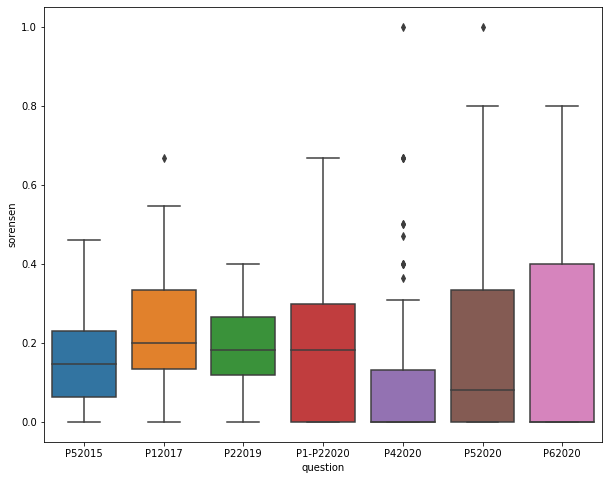

In [14]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 8)
ax = sns.boxplot(x="question", y="sorensen", data=df_metricas_preguntas)

In [15]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].var(ddof=0)

question
P1-P22020    0.051189
P12017       0.044958
P22019       0.021653
P42020       0.084238
P52015       0.040423
P52020       0.072998
P62020       0.113668
Name: overlap, dtype: float64

In [16]:
df_metricas_preguntas.groupby(by=['question'])['overlap'].std(ddof=0)

question
P1-P22020    0.226250
P12017       0.212032
P22019       0.147149
P42020       0.290239
P52015       0.201056
P52020       0.270182
P62020       0.337147
Name: overlap, dtype: float64

In [17]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].var(ddof=0)

question
P1-P22020    0.012537
P12017       0.008745
P22019       0.004201
P42020       0.016610
P52015       0.007689
P52020       0.029372
P62020       0.044310
Name: jaccard, dtype: float64

In [18]:
df_metricas_preguntas.groupby(by=['question'])['jaccard'].std(ddof=0)

question
P1-P22020    0.111967
P12017       0.093516
P22019       0.064815
P42020       0.128881
P52015       0.087687
P52020       0.171383
P62020       0.210499
Name: jaccard, dtype: float64

In [19]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].var(ddof=0)

question
P1-P22020    0.027690
P12017       0.020089
P22019       0.011422
P42020       0.028263
P52015       0.019368
P52020       0.050783
P62020       0.074723
Name: sorensen, dtype: float64

In [20]:
df_metricas_preguntas.groupby(by=['question'])['sorensen'].std(ddof=0)

question
P1-P22020    0.166403
P12017       0.141736
P22019       0.106874
P42020       0.168116
P52015       0.139170
P52020       0.225351
P62020       0.273355
Name: sorensen, dtype: float64

In [40]:
#enfrentando todos los analisis con todos
df2 = df_agrupado
df2 = df2.rename(columns={"Operations":"concept:name"})
columns=['analisis','question','overlap', 'jaccard', 'sorensen']
df_metricas_preguntas = pd.DataFrame(columns=columns)

for i in range(len(df2)):       
    for j in range(i+1,len(df2)):
        grupo = df2.iloc[i]['concept:name']
        analisis = df2.iloc[i]['case:concept:name'] + "-" + df2.iloc[j]['case:concept:name']
        question = df2.iloc[i]['Question'] + df2.iloc[i]['Year'] +"-"+ df2.iloc[j]['Question'] + df2.iloc[j]['Year']
        sorensen = sorensenIndex(grupo,df2.iloc[j]['concept:name'])
        overlap = overlapIndex(grupo,df2.iloc[j]['concept:name'])
        jaccard = jaccardIndex(grupo,df2.iloc[j]['concept:name'])
        new_row={'analisis':analisis, 'question':question, 'overlap': overlap, 'jaccard':jaccard, 'sorensen':sorensen} 
        df_metricas_preguntas = df_metricas_preguntas.append(new_row, ignore_index=True)

In [41]:
df_metricas_preguntas

,analisis,question,overlap,jaccard,sorensen
0,A1 P1 BPI 2017-A1 P1-P2 BPI 2020,P12017-P1-P22020,0.000000,0.000000,0.000000
1,A1 P1 BPI 2017-A1 P2 BPI 2019,P12017-P22019,0.000000,0.000000,0.000000
2,A1 P1 BPI 2017-A1 P5 BPI 2015,P12017-P52015,0.100000,0.050000,0.095238
3,A1 P1 BPI 2017-A1 P5 BPI 2020,P12017-P52020,0.000000,0.000000,0.000000
4,A1 P1 BPI 2017-A1 P6 BPI 2020,P12017-P62020,0.500000,0.090909,0.166667
...,...,...,...,...,...
5990,A8 P5 BPI 2015-A9 P2 BPI 2019,P52015-P22019,0.250000,0.105263,0.190476
5991,A8 P5 BPI 2015-A9 P5 BPI 2015,P52015-P52015,0.555556,0.294118,0.454545
5992,A9 P1 BPI 2017-A9 P2 BPI 2019,P12017-P22019,0.000000,0.000000,0.000000
5993,A9 P1 BPI 2017-A9 P5 BPI 2015,P12017-P52015,0.000000,0.000000,0.000000


In [42]:
df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P52015':'P52015-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P52015':'P52015-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P52015':'P52015-P42020'})
# df_metricas_preguntas = df_metricas_preguntas.replace({'P22020-P52015':'P52015-P22020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P1-P22020-P52015':'P52015-P1-P22020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P12017':'P12017-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P12017':'P12017-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P12017':'P12017-P42020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P1-P22020-P12017':'P12017-P1-P22020'})
# df_metricas_preguntas = df_metricas_preguntas.replace({'P12020-P12017':'P12017-P12020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P22019':'P22019-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P22019':'P22019-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P22019':'P22019-P42020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P1-P22020-P22019':'P22019-P1-P22020'})
# df_metricas_preguntas = df_metricas_preguntas.replace({'P12020-P22019':'P22019-P12020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P12017-P52015':'P52015-P12017'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P22019-P52015':'P52015-P22019'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P22019-P12017':'P12017-P22019'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P1-P22020':'P1-P22020-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P1-P22020':'P1-P22020-P52020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P1-P22020':'P1-P22020-P42020'})
# df_metricas_preguntas = df_metricas_preguntas.replace({'PP1-P22020-P12020':'P12020-P22020'})

# df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P22020':'P22020-P62020'})
# df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P22020':'P22020-P52020'})
# df_metricas_preguntas = df_metricas_preguntas.replace({'P42020-P22020':'P22020-P42020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P42020':'P42020-P62020'})
df_metricas_preguntas = df_metricas_preguntas.replace({'P52020-P42020':'P42020-P52020'})

df_metricas_preguntas = df_metricas_preguntas.replace({'P62020-P52020':'P52020-P62020'})
df_metricas_preguntas

,analisis,question,overlap,jaccard,sorensen
0,A1 P1 BPI 2017-A1 P1-P2 BPI 2020,P12017-P1-P22020,0.000000,0.000000,0.000000
1,A1 P1 BPI 2017-A1 P2 BPI 2019,P12017-P22019,0.000000,0.000000,0.000000
2,A1 P1 BPI 2017-A1 P5 BPI 2015,P52015-P12017,0.100000,0.050000,0.095238
3,A1 P1 BPI 2017-A1 P5 BPI 2020,P12017-P52020,0.000000,0.000000,0.000000
4,A1 P1 BPI 2017-A1 P6 BPI 2020,P12017-P62020,0.500000,0.090909,0.166667
...,...,...,...,...,...
5990,A8 P5 BPI 2015-A9 P2 BPI 2019,P52015-P22019,0.250000,0.105263,0.190476
5991,A8 P5 BPI 2015-A9 P5 BPI 2015,P52015-P52015,0.555556,0.294118,0.454545
5992,A9 P1 BPI 2017-A9 P2 BPI 2019,P12017-P22019,0.000000,0.000000,0.000000
5993,A9 P1 BPI 2017-A9 P5 BPI 2015,P52015-P12017,0.000000,0.000000,0.000000


In [43]:
df_metricas_preguntas.groupby(['question']).mean() #.round(2)

,overlap,jaccard,sorensen
question,,,
P1-P22020-P1-P22020,0.262036,0.115907,0.191182
P1-P22020-P42020,0.091932,0.037607,0.065174
P1-P22020-P52020,0.092924,0.036403,0.063244
P1-P22020-P62020,0.071795,0.027095,0.046785
P12017-P1-P22020,0.130332,0.049888,0.087856
P12017-P12017,0.316572,0.128524,0.216094
P12017-P22019,0.174951,0.063616,0.112189
P12017-P42020,0.112965,0.036790,0.065072
P12017-P52020,0.215962,0.074031,0.127760


In [36]:
round(df_metricas_preguntas.groupby(['question']).var(ddof=0), 2)

C:\Users\maria\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  """Entry point for launching an IPython kernel.


,overlap,jaccard,sorensen
question,,,
P1-P22020-P1-P22020,0.05,0.01,0.03
P1-P22020-P12017,0.03,0.00,0.01
P1-P22020-P42020,0.03,0.00,0.01
P1-P22020-P52020,0.03,0.00,0.01
P1-P22020-P62020,0.02,0.00,0.01
P12017-P1-P22020,0.03,0.00,0.01
P12017-P12017,0.04,0.01,0.02
P12017-P22019,0.04,0.00,0.01
P12017-P42020,0.04,0.00,0.01


In [37]:
round(df_metricas_preguntas.groupby(['question']).std(ddof=0), 2)

,overlap,jaccard,sorensen
question,,,
P1-P22020-P1-P22020,0.23,0.11,0.17
P1-P22020-P12017,0.16,0.06,0.11
P1-P22020-P42020,0.16,0.07,0.11
P1-P22020-P52020,0.16,0.07,0.11
P1-P22020-P62020,0.15,0.06,0.10
P12017-P1-P22020,0.18,0.07,0.12
P12017-P12017,0.21,0.09,0.14
P12017-P22019,0.19,0.07,0.12
P12017-P42020,0.19,0.06,0.10


In [44]:
df_metricas_preguntas.groupby(['question']).mean().describe()

,overlap,jaccard,sorensen
count,28.000000,28.000000,28.000000
mean,0.174687,0.070644,0.116575
std,0.061631,0.033911,0.050418
min,0.071795,0.026358,0.046785
25%,0.130254,0.040413,0.072809
50%,0.171726,0.066913,0.115141
75%,0.219515,0.087101,0.149105
max,0.316572,0.138058,0.216094


In [54]:
df_prueba = pd.read_csv("Log of analysis of time aspects.csv",index_col=0)
# df_prueba = df_prueba.rename(columns={"concept:name": "Operation", "Variant": "concept:name"})

df_prueba["Year"]=df_prueba["Year"].apply(str)
df_prueba['q-y'] = df_prueba['Question'] + '-' + df_prueba['Year']
df_prueba

df3 = df_prueba.groupby(['q-y'])
for name, group in df3:
#     print(name)
    mean = group['Variant'].value_counts().mean()
    if(name == "P5-2015"):
        opu_P52015 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P1-2017'):
        opu_P12017 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P2-2019'):
        opu_P22019 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P1-P2-2020'):
#         opu_P12020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
#     elif(name == 'P2-2020'):
        opu_P1_P222020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P4-2020'):
        opu_P42020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P5-2020'):
        opu_P52020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index
    elif(name == 'P6-2020'):
        opu_P62020 = group['Variant'].value_counts()[group['Variant'].value_counts()>mean].index

In [46]:
#to show commom variants between questions
opu_4_5_2020 = set(opu_P42020).intersection(set(opu_P52020))
opu_4_5_6_2020 = opu_4_5_2020.intersection(set(opu_P62020))
opu_6_5_2020 = set(opu_P62020).intersection(set(opu_P52020))
opu_6_4_2020 = set(opu_P62020).intersection(set(opu_P42020))
opu_4_5_6_2020

{'Calculate cycle time for all pairs of events for all traces',
 'Filter traces by activities',
 'Represent process map with cycle time'}

In [47]:
opu_1_17_5_20 = set(opu_P12017).intersection(set(opu_P52020))
opu_1_17_5_6_20 = opu_1_17_5_20.intersection(set(opu_P62020))
opu_6_5_2020 = set(opu_P62020).intersection(set(opu_P52020))
opu_1_17_6_2020 = set(opu_P62020).intersection(set(opu_P12017))
opu_1_17_5_6_20

{'Filter traces by activities',
 'Find activities as bottlenecks applying temporal performance criteria',
 'Represent process map with cycle time'}

In [55]:
opu_1_20_5_15 = set(opu_P1_P222020).intersection(set(opu_P52015))
opu_1_20_5__15_2_19 = opu_1_20_5_15.intersection(set(opu_P22019))
opu_1_20_2_19 = set(opu_P1_P222020).intersection(set(opu_P22019))
opu_2_19_5_15 = set(opu_P22019).intersection(set(opu_P52015))
opu_1_20_5__15_2_19

{'Calculate cycle time of the whole process for each subset of traces',
 'Calculate number of traces',
 'Filter traces by activities',
 'Represent histograms of cycle time'}

In [56]:
opu_17_15 = set(opu_P12017).intersection(set(opu_P52015))
opu_17_19_15 = opu_17_15.intersection(set(opu_P22019))
opu_17_19 = set(opu_P12017).intersection(set(opu_P22019))
opu_19_15 = set(opu_P22019).intersection(set(opu_P52015))
opu_17_19_15

{'Calculate number of traces',
 'Filter traces by activities',
 'Represent histograms of cycle time',
 'Represent process map with cycle time'}